In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [4]:
#Loading the Dataset:

In [5]:
data = pd.read_csv("data.csv")

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



Feature Descriptions:

| Feature     | Description                                                         | Type                          |                                   
| ----------- | ------------------------------------------------------------------- | ----------------------------- |
|   CRIM      | Per capita crime rate by town                                       | Continuous                    | 
|   ZN        | Proportion of residential land zoned for lots over 25,000 sq.ft.    | Continuous                    | 
|   INDUS     | Proportion of non-retail business acres per town                    | Continuous                    | 
|   CHAS      | Charles River dummy variable (1 if tract bounds river; 0 otherwise) | Categorical (binary)          | 
|   NOX       | Nitric oxide concentration (parts per 10 million)                   | Continuous                    | 
|   RM        | Average number of rooms per dwelling                                | Continuous                    | 
|   AGE       | Proportion of owner-occupied units built before 1940                | Continuous                    | 
|   DIS       | Weighted distance to five Boston employment centers                 | Continuous                    | 
|   RAD       | Index of accessibility to radial highways                           | Discrete                      | 
|   TAX       | Property tax rate per \$10,000                                      | Continuous                    | 
|   PTRATIO   | Pupil–teacher ratio by town                                         | Continuous                    | 
|   B         | 1000(Bk − 0.63)² where Bk is the proportion of Black residents      | Continuous (social indicator) | 
|   LSTAT     | % lower status of the population                                    | Continuous                    | 
|   PRICE     | Median value of owner-occupied homes in \$1000s (Target variable)   | Continuous                    |

- CHAS is the only binary (0 or 1) categorical feature.
- B is a non-linear transformation of race-based data and can reflect complex socioeconomic factors.
- LSTAT is often the strongest negative predictor — neighborhoods with more economically disadvantaged populations tend to have lower house prices.
- RM typically shows the strongest positive correlation — more rooms, higher price.
  

In [7]:
data.shape

(506, 14)

In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
target = data['PRICE']


Correlation:
    Correlation helps us understand how changes in one feature affect another. It ranges from -1 (perfect negative) to +1 (perfect positive). A correlation near 0 indicates no linear relationship.
    

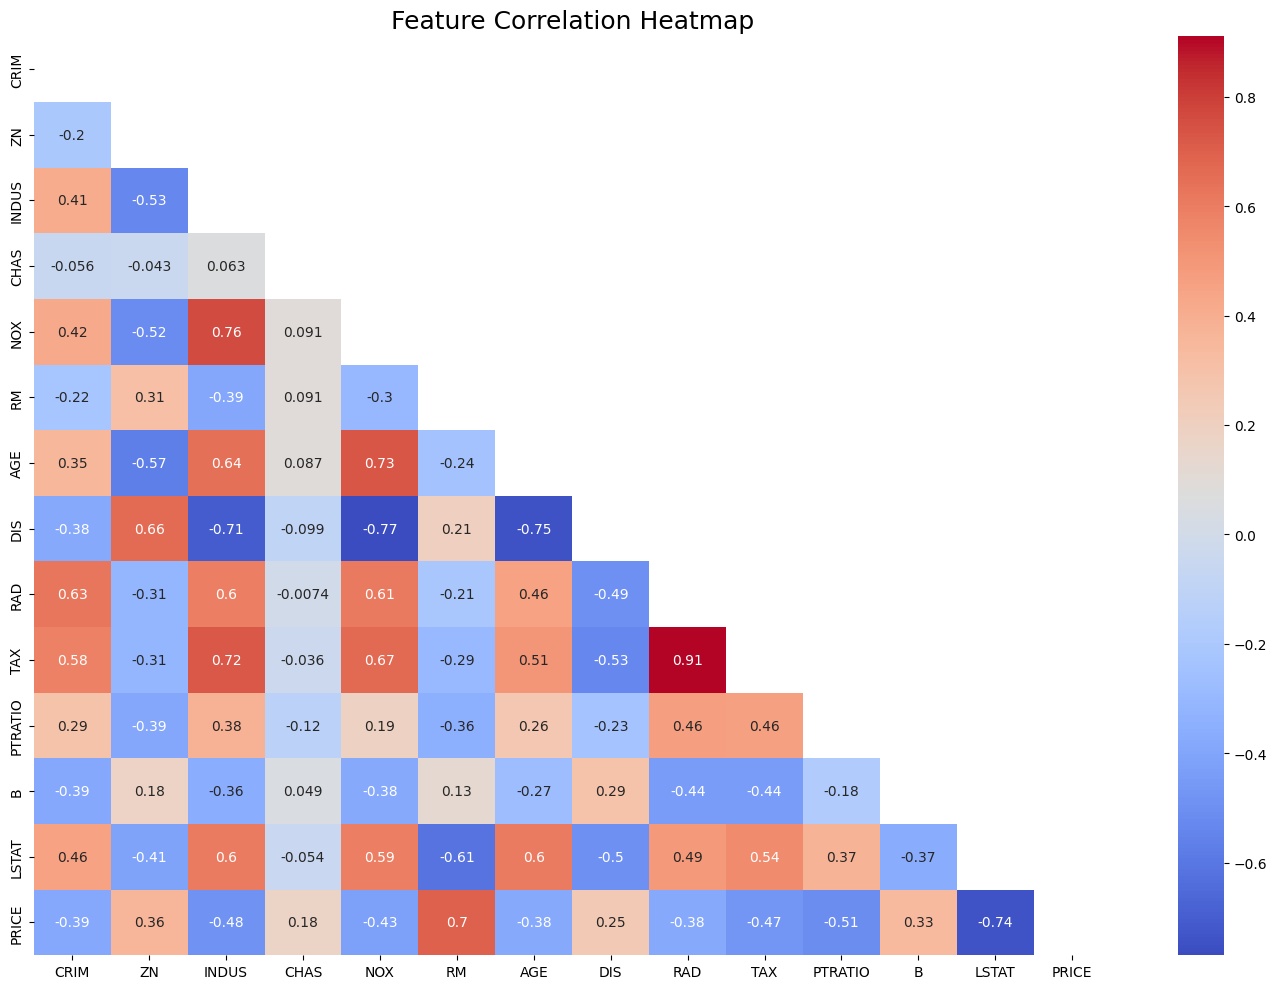

In [11]:
plt.figure(figsize=(14, 10))
mask_matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=mask_matrix, cmap="coolwarm")
plt.title("Feature Correlation Heatmap", fontsize=18)
plt.tight_layout()
plt.show()


Top Correlated Features with Target (PRICE):

| Feature     | Correlation with `PRICE` | Interpretation                                                                             |
| ----------- | ------------------------ | ------------------------------------------------------------------------------------------ |
|   RM        |   +0.701                 | Higher number of rooms is strongly associated with higher house prices.                    |
|   LSTAT     |   -0.744                 | Higher percentage of lower-status population is strongly associated with lower prices.     |
|   PTRATIO   |   -0.508                 | Higher pupil-teacher ratios tend to correlate with lower house prices.                     |
|   INDUS     |   -0.391                 | Higher proportion of non-retail business land correlates with lower house prices.          |
|   TAX       |   -0.469                 | Higher property taxes tend to reduce house prices.                                         |
|   NOX       |   -0.427                 | Higher nitric oxide concentration in the air relates to lower prices.                      |
|   CRIM      |   -0.389                 | Higher crime rate is negatively associated with house prices.                              |

Positively Correlated:
- RM: Strongest positive correlation (+0.701). More rooms → higher house value.
- B: Weak positive correlation (~+0.333). Possibly related to demographic/ethnic factors.
- ZN: Somewhat weak positive correlation (~+0.175). Higher proportion of residential land might increase value.

Negatively Correlated:
- LSTAT: Strongest negative correlation (–0.744). Key indicator of socioeconomic disadvantage.
- PTRATIO, NOX, TAX, CRIM: Also negatively correlated, indicating quality of living factors that bring down price.
  

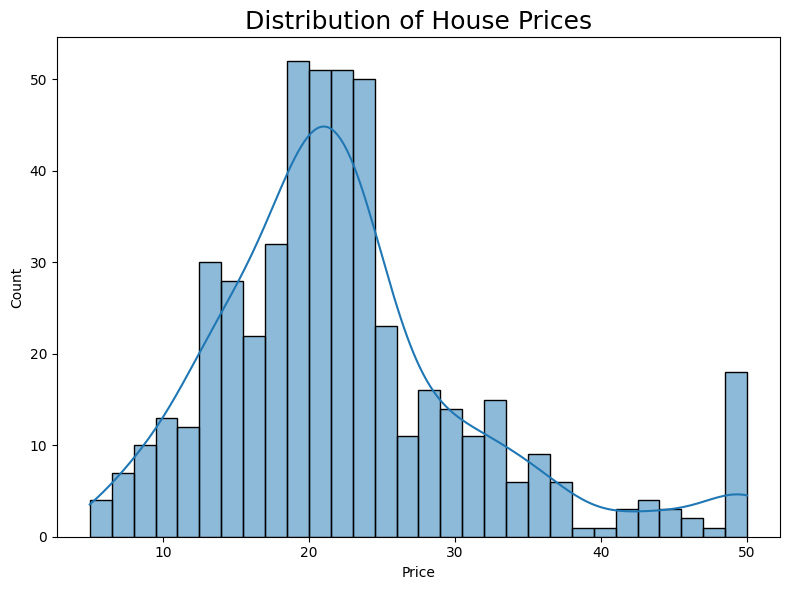

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data['PRICE'], kde=True, bins=30)
plt.title("Distribution of House Prices", fontsize=18)
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Distribution of House prices:
- The distribution of house prices is slightly right-skewed, meaning:
    - Most houses are clustered around the $20,000–$25,000 range.
    - A smaller number of houses have significantly higher prices (up to $50,000).
- The KDE (kernel density estimate) shows a smooth curve representing the probability density.
- This indicates non-uniform pricing, with a larger number of moderately priced houses and fewer luxury homes.
  

In [13]:
px.scatter(data, x='RM', y='PRICE', title='Number of Rooms vs Price').show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed


Number of rooms vs Price:
- There is a strong positive linear correlation between the number of rooms in a dwelling and its price (correlation ≈ +0.70).
- As the number of rooms increases, the house price tends to increase as well.
- The plot shows a rising trend with some outliers:
    - Some houses with many rooms have surprisingly lower prices—these could be anomalies or affected by other factors (e.g., location or crime).
      

In [14]:
px.scatter(data, x='LSTAT', y='PRICE', title='% Lower Status Population vs Price').show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [15]:

'''% Lower Status Population vs Price:
- There is a strong negative correlation between the percentage of lower-status population and house price (correlation ≈ -0.74).
- As LSTAT increases (i.e., poorer areas), house prices significantly decrease.
- The relationship is non-linear and appears curved — prices drop sharply as LSTAT increases beyond a certain point (about 10–15%).
- This makes LSTAT a powerful predictor for the target variable.
                                       '''

'% Lower Status Population vs Price:\n- There is a strong negative correlation between the percentage of lower-status population and house price (correlation ≈ -0.74).\n- As LSTAT increases (i.e., poorer areas), house prices significantly decrease.\n- The relationship is non-linear and appears curved — prices drop sharply as LSTAT increases beyond a certain point (about 10–15%).\n- This makes LSTAT a powerful predictor for the target variable.\n                                       '

In [16]:
px.scatter(data, x='CRIM', y='PRICE', title='Crime Rate vs Price').show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed


Crime rate vs Price:
- There is a moderate negative correlation between crime rate and house price (correlation ≈ -0.39).
- In general, as the crime rate increases, house prices tend to decrease.
- However, the scatter plot shows a lot of variation — many houses with low prices exist even in areas with low crime.
- This suggests that crime rate affects house price, but not as strongly or linearly as other factors like RM or LSTAT.
  

In [17]:
X = data.drop("PRICE", axis=1)
y = data["PRICE"]


Why Scaling is Important? 
- In the Boston Housing dataset, different features (like CRIM, TAX, RM, etc.) are on different scales:
    - CRIM (crime rate) ranges from 0 to 88
    - ZN (proportion of residential land) ranges from 0 to 100
    - RM (number of rooms) is around 4 to 8
    - PRICE ranges from $5,000 to $50,000
- Some machine learning models (like Linear Regression, KNN, SVM, and even Gradient Descent-based models) are sensitive to these varying feature scales.
- If we don't scale:
    - Features with larger numerical ranges may dominate the model training.
    - This can lead to biased results or slower convergence during optimization.

What StandardScaler Does ?
- StandardScaler standardizes features by removing the mean and scaling to unit variance:
    X(scaled) = (X−μ)/σ
    Where:
    - X is the original value,
    - μ is the mean of the feature,
    - σ is the standard deviation.

- So after scaling:
    - Each feature has mean = 0
    - Each feature has standard deviation = 1
      

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

In [21]:
results = {"Model": [], "MAE": [], "MSE": [], "R2": []}

In [22]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

    results["Model"].append(name)
    results["MAE"].append(mae)
    results["MSE"].append(mse)
    results["R2"].append(r2)


Linear Regression
MAE: 3.1891
MSE: 24.2911
R² Score: 0.6688

Decision Tree
MAE: 2.3118
MSE: 10.2084
R² Score: 0.8608

Random Forest
MAE: 2.0648
MSE: 9.1009
R² Score: 0.8759

XGBoost
MAE: 1.8909
MSE: 6.9092
R² Score: 0.9058


In [23]:
results_df = pd.DataFrame(results)


- Lower MAE means more accurate predictions.
- Lower MSE suggests better performance and less severe prediction mistakes.
- Higher R² means the model captures more of the data's underlying patterns. A score close to 1 indicates a very good fit.
  

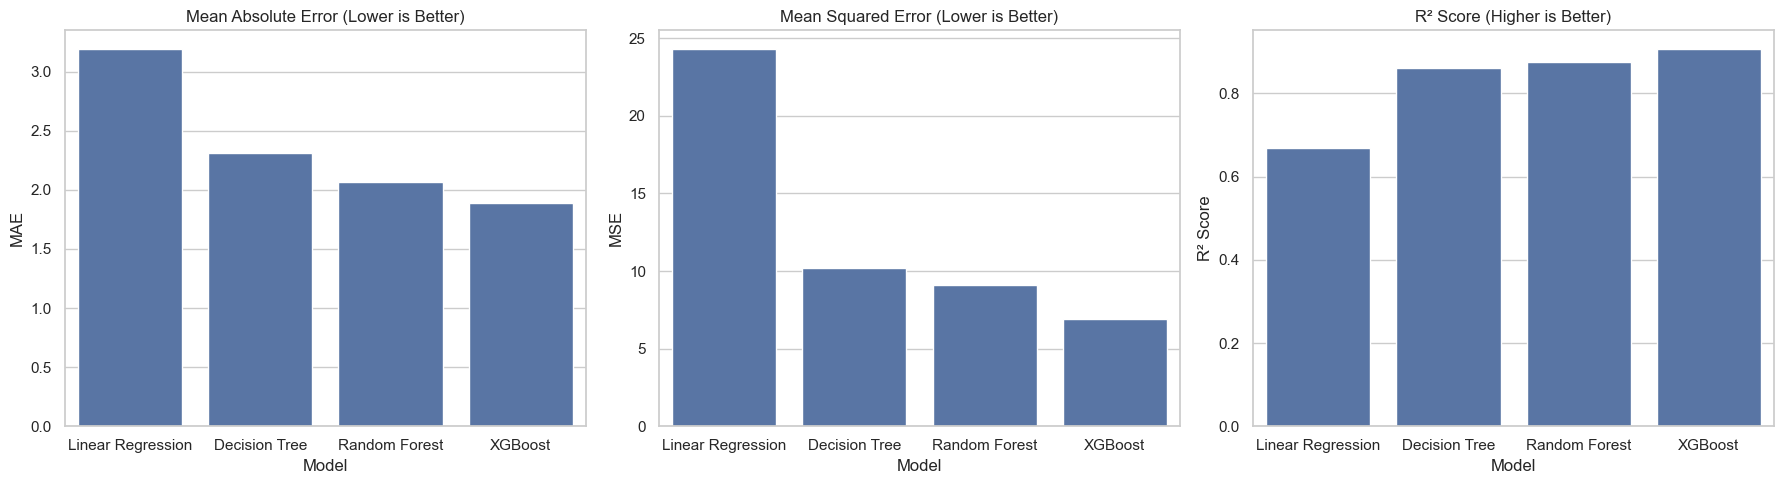

In [24]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# MAE plot
sns.barplot(data=results_df, x="Model", y="MAE", ax=axs[0])
axs[0].set_title("Mean Absolute Error (Lower is Better)")
axs[0].set_ylabel("MAE")

# MSE plot
sns.barplot(data=results_df, x="Model", y="MSE", ax=axs[1])
axs[1].set_title("Mean Squared Error (Lower is Better)")
axs[1].set_ylabel("MSE")

# R² Score plot
sns.barplot(data=results_df, x="Model", y="R2", ax=axs[2])
axs[2].set_title("R² Score (Higher is Better)")
axs[2].set_ylabel("R² Score")

plt.tight_layout()
plt.show()

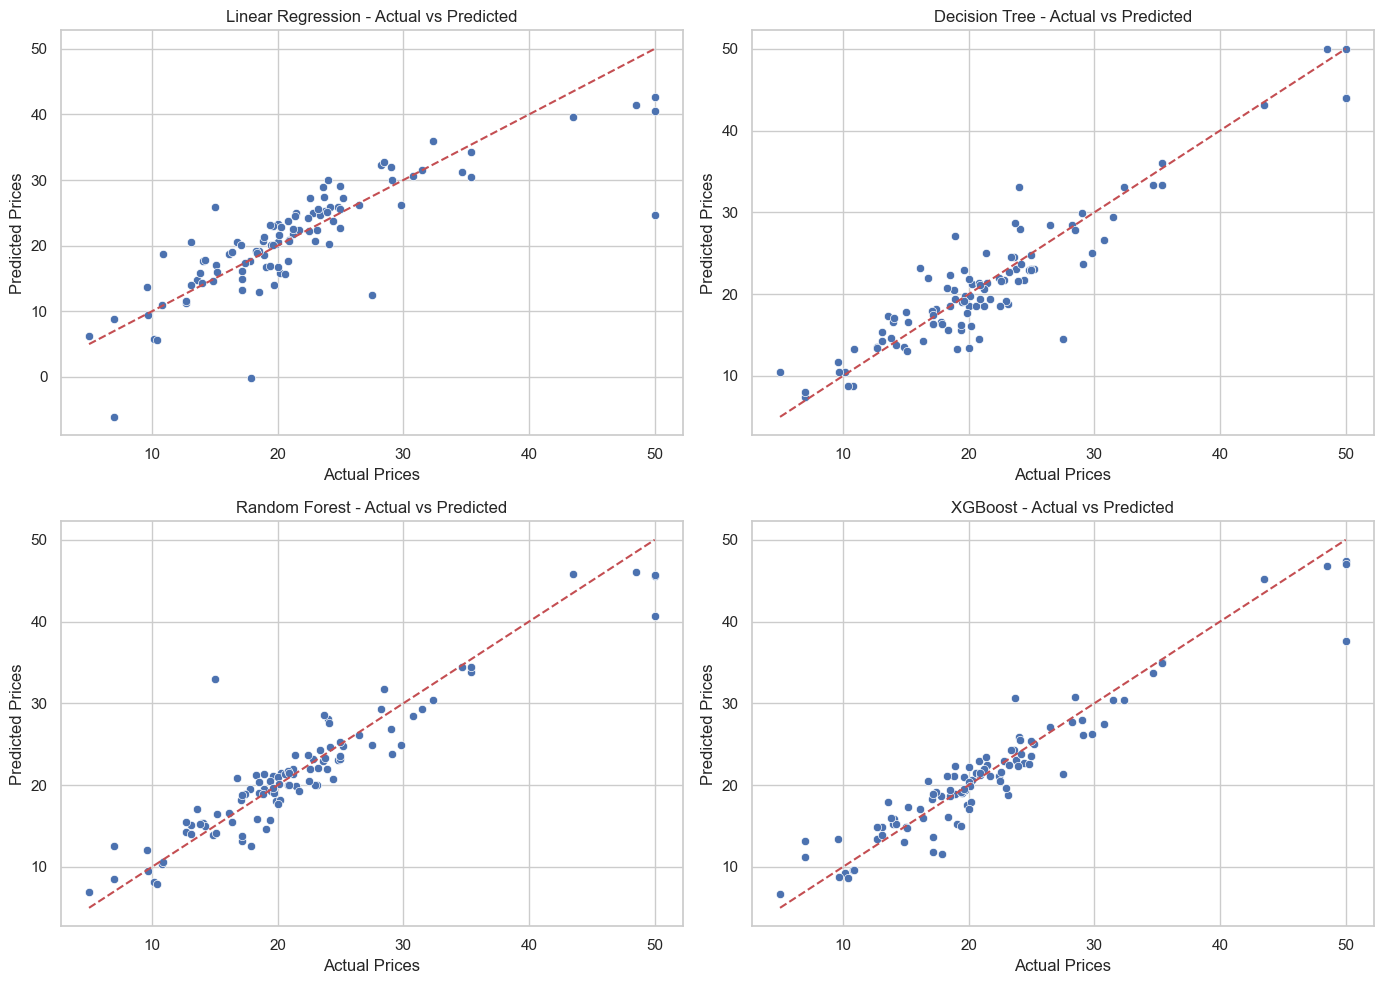

In [25]:
# Plot Actual vs Predicted for all models
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    
    sns.scatterplot(x=y_test, y=y_pred, ax=axs[i])
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
    axs[i].set_title(f"{name} - Actual vs Predicted")
    axs[i].set_xlabel("Actual Prices")
    axs[i].set_ylabel("Predicted Prices")

plt.tight_layout()
plt.show()


✔️ Good Prediction (Ideal Case):
    - Points are tightly clustered along the red dashed line.
    - This means the model’s predictions are very close to actual values.

❌ Poor Prediction:
    - Points are widely scattered away from the red line.
    - Indicates the model is making large errors and not capturing the underlying pattern well.

🔁 Over/Under-Prediction:
    - Points consistently above the line → model underpredicts.
    - Points consistently below the line → model overpredicts.

Conclusion: XGBoost regressor is the best fit for Boston House Price Prediction.

In [26]:
#Prediction: 

In [27]:
new_data = np.array([[0.05,   # CRIM
                      0.0,    # ZN
                      4.0,    # INDUS
                      0.0,    # CHAS
                      0.45,   # NOX
                      6.5,    # RM
                      30.0,   # AGE
                      6.0,    # DIS
                      5.0,    # RAD
                      300.0,  # TAX
                      16.0,   # PTRATIO
                      390.0,  # B
                      5.0]])  # LSTAT

In [28]:
new_df = pd.DataFrame(new_data, columns=X.columns)
new_df = scaler.transform(new_df)

In [29]:
xgb_model = models["XGBoost"]

In [30]:
predicted_price = xgb_model.predict(new_df)

print(f"Predicted house price: ${predicted_price[0]:.2f}")

Predicted house price: $24.80


In [ ]:
#pip install streamlit


Note: you may need to restart the kernel to use updated packages.
